In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
for path, subdirs, files in os.walk(os.getcwd() + "/structured_data"):
    for name in files:
        print(os.path.join(path, name))

C:\Users\basvd\Dropbox\Scriptie/structured_data\DAS.csv
C:\Users\basvd\Dropbox\Scriptie/structured_data\VOC Cochin Slave Transactions 1706-1801 - IISH - Database - 2018 - v1.csv
C:\Users\basvd\Dropbox\Scriptie/structured_data\VOC Cochin Slave Transport Permissions 1770-1795 - IISH - Database - 2018 - v1.csv
C:\Users\basvd\Dropbox\Scriptie/structured_data\VOC_pers.csv


In [4]:
def show_word_cloud(series, file_name=""):
    wordcloud = WordCloud(background_color="white").generate(" ".join(list(series)))

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(file_name)
    plt.show()

# Transactions

## Missing values

In [5]:
transactions = pd.read_csv("structured_data\VOC Cochin Slave Transactions 1706-1801 - IISH - Database - 2018 - v1.csv").dropna(how='all', axis=1).dropna(how='all', axis=0)
transactions

ID  Verkoop Inventarisnummer   Scan  Plaats       Datum  \
0        554-1-1      1.0              554    1.0  Cochin  1753-01-02   
1        554-3-1      1.0              554    3.0  Cochin  1753-01-02   
2        554-5-1      1.0              554    5.0  Cochin  1753-01-11   
3        554-6-1      1.0              554    6.0  Cochin  1753-01-12   
4        554-8-1      1.0              554    8.0  Cochin  1753-01-13   
...          ...      ...              ...    ...     ...         ...   
7192  1434-146-1      1.0             1434  146.0  Cochin  1793-12-09   
7193  1434-147-1      1.0             1434  147.0  Cochin  1793-12-09   
7194  1434-148-1      1.0             1434  148.0  Cochin  1793-12-09   
7195  1434-149-1      1.0             1434  149.0  Cochin  1793-12-09   
7196  1434-150-1      1.0             1434  150.0  Cochin  1793-12-09   

               VerkoperVoornaam VerkoperPatroniem VerkoperTussen  \
0                       Michiel               NaN            NaN   
1                       Michiel               NaN            NaN   
2                       Gillis                NaN        van der   
3                       Michiel               NaN            NaN   
4                         Jacob               NaN            NaN   
...                         ...               ...            ...   
7192                   Schoesen               NaN            NaN   
7193         Marielwittil Schoe               NaN            NaN   
7194                     Seidoe               NaN            NaN   
7195  Madatilparambil Tjangaren               NaN            NaN   
7196                    Amadoe                NaN            NaN   

     VerkoperAchternaam  ...     KoperWerkplek KoperEtniciteit  \
0                Kruijs  ...  Schip Sloterdijk             NaN   
1                Kruijs  ...  Schip Sloterdijk             NaN   
2                 Sloot  ...               NaN             NaN   
3                 Kruys  ...  Schip Sloterdijk             NaN   
4                  Smit  ...               NaN             NaN   
...                 ...  ...               ...             ...   
7192               Mira  ...               NaN            Moor   
7193              Miran  ...               NaN            Moor   
7194             Japhar  ...               NaN            Moor   
7195               Koma  ...               NaN            Moor   
7196            Miedien  ...               NaN             NaN   

                                            KoperStatus SlaafNaamNieuw  \
0                                                   VOC       December   
1                                                   VOC       Neptunes   
2                                                   VOC         Dalima   
3                                                   VOC      Februarij   
4                                                   VOC        Fortuyn   
...                                                 ...            ...   
7192                             Woonagtig te Kalwettij         Tanjon   
7193                             Woonagtig te Kalwettij          Ambar   
7194                             Woonagtig te Kalwettij         August   
7195                             Woonagtig te Kalwettij      September   
7196  Wedewe van den Ooster Kap:n Bapo Sali: woonagt...        Miratji   

     SlaafNaamOrigineel SlaafTaalNaam     SlaafKaste SlaafGender  \
0                   NaN           NaN            NaN           m   
1                   NaN           NaN            NaN           m   
2                   NaN           NaN            NaN           v   
3                   NaN           NaN            NaN           m   
4                   NaN           NaN            NaN           m   
...                 ...           ...            ...         ...   
7192              Kadia           NaN           Moor           v   
7193           Koroenba    Mallabaars   Parea Heiden           m   
7194            Tjatten   

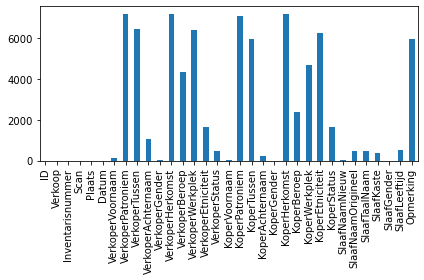

In [6]:
transactions.isnull().sum(axis = 0).plot.bar()
plt.tight_layout()
plt.savefig('Figures/EDA/Transactions_slaves/missing_data.png')

In [7]:
transactions = pd.read_csv("structured_data\VOC Cochin Slave Transactions 1706-1801 - IISH - Database - 2018 - v1.csv").dropna(how='all', axis=1).replace('[leeg]', np.nan).replace('[…]', np.nan).replace('[...]', np.nan).dropna(how='all', axis=0)

## General overview

In [8]:
transactions

ID  Verkoop Inventarisnummer   Scan  Plaats       Datum  \
0        554-1-1      1.0              554    1.0  Cochin  1753-01-02   
1        554-3-1      1.0              554    3.0  Cochin  1753-01-02   
2        554-5-1      1.0              554    5.0  Cochin  1753-01-11   
3        554-6-1      1.0              554    6.0  Cochin  1753-01-12   
4        554-8-1      1.0              554    8.0  Cochin  1753-01-13   
...          ...      ...              ...    ...     ...         ...   
7192  1434-146-1      1.0             1434  146.0  Cochin  1793-12-09   
7193  1434-147-1      1.0             1434  147.0  Cochin  1793-12-09   
7194  1434-148-1      1.0             1434  148.0  Cochin  1793-12-09   
7195  1434-149-1      1.0             1434  149.0  Cochin  1793-12-09   
7196  1434-150-1      1.0             1434  150.0  Cochin  1793-12-09   

               VerkoperVoornaam VerkoperPatroniem VerkoperTussen  \
0                       Michiel               NaN            NaN   
1                       Michiel               NaN            NaN   
2                       Gillis                NaN        van der   
3                       Michiel               NaN            NaN   
4                         Jacob               NaN            NaN   
...                         ...               ...            ...   
7192                   Schoesen               NaN            NaN   
7193         Marielwittil Schoe               NaN            NaN   
7194                     Seidoe               NaN            NaN   
7195  Madatilparambil Tjangaren               NaN            NaN   
7196                    Amadoe                NaN            NaN   

     VerkoperAchternaam  ...     KoperWerkplek KoperEtniciteit  \
0                Kruijs  ...  Schip Sloterdijk             NaN   
1                Kruijs  ...  Schip Sloterdijk             NaN   
2                 Sloot  ...               NaN             NaN   
3                 Kruys  ...  Schip Sloterdijk             NaN   
4                  Smit  ...               NaN             NaN   
...                 ...  ...               ...             ...   
7192               Mira  ...               NaN            Moor   
7193              Miran  ...               NaN            Moor   
7194             Japhar  ...               NaN            Moor   
7195               Koma  ...               NaN            Moor   
7196            Miedien  ...               NaN             NaN   

                                            KoperStatus SlaafNaamNieuw  \
0                                                   VOC       December   
1                                                   VOC       Neptunes   
2                                                   VOC         Dalima   
3                                                   VOC      Februarij   
4                                                   VOC        Fortuyn   
...                                                 ...            ...   
7192                             Woonagtig te Kalwettij         Tanjon   
7193                             Woonagtig te Kalwettij          Ambar   
7194                             Woonagtig te Kalwettij         August   
7195                             Woonagtig te Kalwettij      September   
7196  Wedewe van den Ooster Kap:n Bapo Sali: woonagt...        Miratji   

     SlaafNaamOrigineel SlaafTaalNaam     SlaafKaste SlaafGender  \
0                   NaN           NaN            NaN           m   
1                   NaN           NaN            NaN           m   
2                   NaN           NaN            NaN           v   
3                   NaN           NaN            NaN           m   
4                   NaN           NaN            NaN           m   
...                 ...           ...            ...         ...   
7192              Kadia           NaN           Moor           v   
7193           Koroenba    Mallabaars   Parea Heiden           m   
7194            Tjatten   

In [9]:
t = transactions.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  7197 non-null   object 
 1   Verkoop             7197 non-null   float64
 2   Inventarisnummer    7197 non-null   object 
 3   Scan                7197 non-null   float64
 4   Plaats              7197 non-null   object 
 5   Datum               7158 non-null   object 
 6   VerkoperVoornaam    7007 non-null   object 
 7   VerkoperPatroniem   13 non-null     object 
 8   VerkoperTussen      765 non-null    object 
 9   VerkoperAchternaam  6125 non-null   object 
 10  VerkoperGender      7145 non-null   object 
 11  VerkoperHerkomst    1 non-null      object 
 12  VerkoperBeroep      2873 non-null   object 
 13  VerkoperWerkplek    804 non-null    object 
 14  VerkoperEtniciteit  5518 non-null   object 
 15  VerkoperStatus      6734 non-null   object 
 16  KoperV

In [10]:
t

In [11]:
transactions.describe()

Verkoop         Scan
count  7197.000000  7197.000000
mean      1.144783   123.566486
std       1.003270    94.235458
min       1.000000     1.000000
25%       1.000000    51.000000
50%       1.000000   104.000000
75%       1.000000   173.000000
max      17.000000   526.000000

In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  7197 non-null   object 
 1   Verkoop             7197 non-null   float64
 2   Inventarisnummer    7197 non-null   object 
 3   Scan                7197 non-null   float64
 4   Plaats              7197 non-null   object 
 5   Datum               7158 non-null   object 
 6   VerkoperVoornaam    7007 non-null   object 
 7   VerkoperPatroniem   13 non-null     object 
 8   VerkoperTussen      765 non-null    object 
 9   VerkoperAchternaam  6125 non-null   object 
 10  VerkoperGender      7145 non-null   object 
 11  VerkoperHerkomst    1 non-null      object 
 12  VerkoperBeroep      2873 non-null   object 
 13  VerkoperWerkplek    804 non-null    object 
 14  VerkoperEtniciteit  5518 non-null   object 
 15  VerkoperStatus      6734 non-null   object 
 16  KoperV

## Gender of slaves

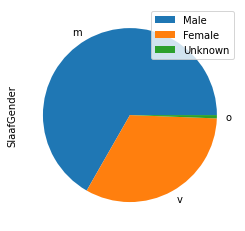

In [13]:
transactions["SlaafGender"].replace("[m]","m").replace("[v]","v").replace(float("nan"), "o").value_counts(dropna=False).plot.pie()
plt.legend(["Male", "Female", "Unknown"])

plt.savefig('Figures/EDA/Transactions_slaves/Gender.png')

## Age of slaves

In [14]:
pd.to_numeric(transactions["SlaafLeeftijd"], errors='coerce').mean()

14.620695077842427

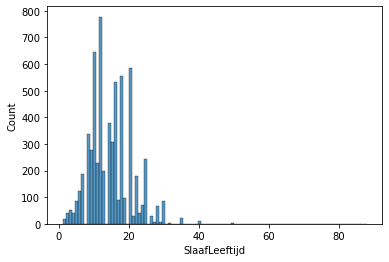

In [15]:
sns.histplot(data=pd.to_numeric(transactions["SlaafLeeftijd"], errors='coerce'))
plt.savefig('Figures/EDA/Transactions_slaves/Age.png')

## Names of slaves

In [16]:
transactions["SlaafNaamNieuw"].dropna().value_counts()

Januarij     233
Augustus     209
September    161
April        153
October      134
            ... 
[…]pido        1
Jo[…]          1
Thiadoza       1
[…]ber         1
Tanjon         1
Name: SlaafNaamNieuw, Length: 1826, dtype: int64

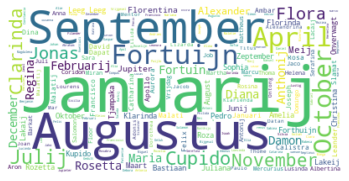

In [17]:
show_word_cloud(transactions["SlaafNaamNieuw"].dropna(), 'Figures/EDA/Transactions_slaves/New_names.png')

In [18]:
transactions["SlaafNaamOrigineel"].dropna().value_counts()

Ramen          183
Chakij         155
Canden         126
Chaten         120
Aijapen        112
              ... 
Chendenapen      1
Janawadij        1
Oepen            1
Doele            1
Koenjikadia      1
Name: SlaafNaamOrigineel, Length: 2837, dtype: int64

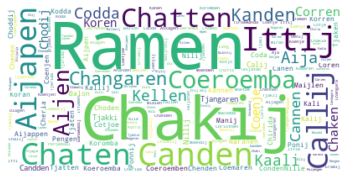

In [19]:
show_word_cloud(transactions["SlaafNaamOrigineel"].dropna(), 'Figures/EDA/Transactions_slaves/Old_names.png')

# Timeline

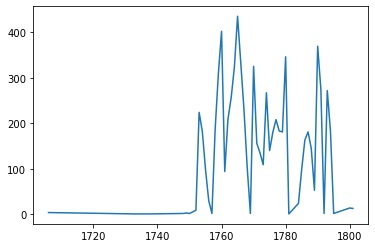

In [20]:
pd.to_datetime(transactions['Datum'], errors="coerce").dt.year.dropna().value_counts().sort_index().plot()

## Owners

### Buyer

In [21]:
transactions.columns

Index(['ID', 'Verkoop', 'Inventarisnummer', 'Scan', 'Plaats', 'Datum',
       'VerkoperVoornaam', 'VerkoperPatroniem', 'VerkoperTussen',
       'VerkoperAchternaam', 'VerkoperGender', 'VerkoperHerkomst',
       'VerkoperBeroep', 'VerkoperWerkplek', 'VerkoperEtniciteit',
       'VerkoperStatus', 'KoperVoornaam', 'KoperPatroniem', 'KoperTussen',
       'KoperAchternaam', 'KoperGender', 'KoperHerkomst', 'KoperBeroep',
       'KoperWerkplek', 'KoperEtniciteit', 'KoperStatus', 'SlaafNaamNieuw',
       'SlaafNaamOrigineel', 'SlaafTaalNaam', 'SlaafKaste', 'SlaafGender',
       'SlaafLeeftijd', 'Opmerking'],
      dtype='object')

#### Gender

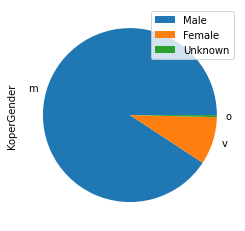

In [22]:
transactions["KoperGender"].replace("[m]","m").replace("[v]","v").replace(float("nan"), "o").value_counts(dropna=False).plot.pie()
plt.legend(["Male", "Female", "Unknown"])

plt.savefig('Figures/EDA/Transactions_owners/gender_buyers.png')

#### First name

In [23]:
transactions["KoperVoornaam"].dropna().value_counts()

Jan                       343
Johannes                  192
Jacob                     182
Pieter                    158
Hendrik                   153
                         ... 
Johan George Diederich      1
Johan Kasper                1
Hendirk                     1
James                       1
Lodewijk Joseph             1
Name: KoperVoornaam, Length: 1468, dtype: int64

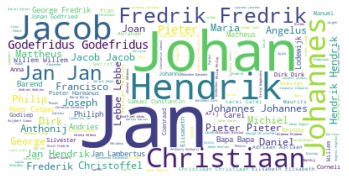

In [24]:
show_word_cloud(transactions["KoperVoornaam"].dropna(), 'Figures/EDA/Transactions_owners/first_names_buyers.png')

#### Achternaam

In [25]:
transactions["KoperAchternaam"].dropna().value_counts()

Weijerman    106
Cunes        102
Sloot         95
Jansz:        91
Wolff         84
            ... 
Zeets          1
Laurensz:      1
Arouja         1
Mentsz.        1
Soutter        1
Name: KoperAchternaam, Length: 2065, dtype: int64

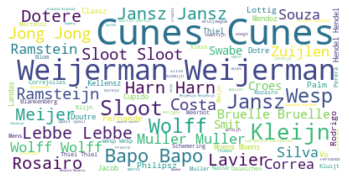

In [26]:
show_word_cloud(transactions["KoperAchternaam"].dropna(), 'Figures/EDA/Transactions_owners/last_names_buyers.png')

#### Occupations

In [27]:
transactions["KoperBeroep"].dropna().value_counts()

Soldaat                                                 371
Sergeant                                                169
Zoldaat                                                 136
Corporaal                                               125
Boekhouder                                              120
                                                       ... 
Cannonir                                                  1
Oostersche ser[geant]                                     1
Opperkoopman hooft administrateur en secunde              1
Oppercoopman en secunde                                   1
Onderkoopman en opperhoofd van Koilang thans in loco      1
Name: KoperBeroep, Length: 1229, dtype: int64

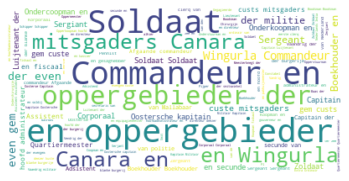

In [28]:
show_word_cloud(transactions["KoperBeroep"].dropna(), 'Figures/EDA/Transactions_owners/occupation_buyers.png')

#### Ethnicity

In [29]:
transactions["KoperEtniciteit"].dropna().value_counts()

Toepas          407
Moor            229
Mixties          55
Christen         34
Jood             30
               ... 
Fransch           1
Baliesch          1
Balisch           1
Armeij[nder]      1
Parwa             1
Name: KoperEtniciteit, Length: 68, dtype: int64

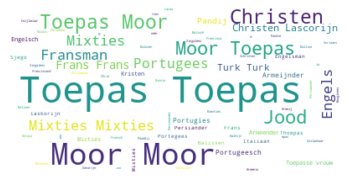

In [30]:
show_word_cloud(transactions["KoperEtniciteit"].dropna(), 'Figures/EDA/Transactions_owners/ethnicity_buyers.png')

### Seller

In [31]:
transactions.columns

Index(['ID', 'Verkoop', 'Inventarisnummer', 'Scan', 'Plaats', 'Datum',
       'VerkoperVoornaam', 'VerkoperPatroniem', 'VerkoperTussen',
       'VerkoperAchternaam', 'VerkoperGender', 'VerkoperHerkomst',
       'VerkoperBeroep', 'VerkoperWerkplek', 'VerkoperEtniciteit',
       'VerkoperStatus', 'KoperVoornaam', 'KoperPatroniem', 'KoperTussen',
       'KoperAchternaam', 'KoperGender', 'KoperHerkomst', 'KoperBeroep',
       'KoperWerkplek', 'KoperEtniciteit', 'KoperStatus', 'SlaafNaamNieuw',
       'SlaafNaamOrigineel', 'SlaafTaalNaam', 'SlaafKaste', 'SlaafGender',
       'SlaafLeeftijd', 'Opmerking'],
      dtype='object')

In [32]:
transactions["VerkoperVoornaam"].dropna().value_counts()

Anthonij                     182
Bastiaan                     166
Abraham                      114
Thomen                       106
Domingo                      103
                            ... 
Ponaparambil Mieden            1
Tjalawalapil Naranen           1
H:                             1
Maien                          1
Madatilparambil Tjangaren      1
Name: VerkoperVoornaam, Length: 2730, dtype: int64

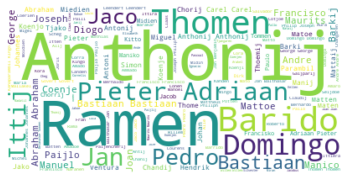

In [33]:
show_word_cloud(transactions["VerkoperVoornaam"].dropna(), 'Figures/EDA/Transactions_owners/first_names_sellers.png')

# Permissions

## Missing data

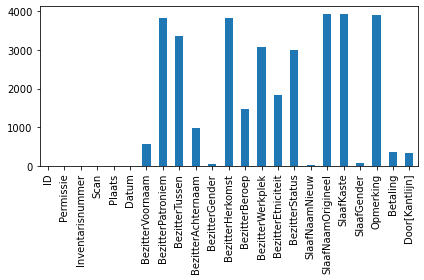

In [34]:
permissions = pd.read_csv("structured_data\VOC Cochin Slave Transport Permissions 1770-1795 - IISH - Database - 2018 - v1.csv").dropna(how='all', axis=1).dropna(how='all', axis=0)
permissions.isnull().sum(axis = 0).plot.bar()
plt.tight_layout()
plt.savefig('Figures/EDA/Permissions_slaves/missing_data.png')

In [35]:
permissions = pd.read_csv("structured_data\VOC Cochin Slave Transport Permissions 1770-1795 - IISH - Database - 2018 - v1.csv").dropna(how='all', axis=1).replace('[leeg]', np.nan).replace('[…]', np.nan).replace('[...]', np.nan).dropna(how='all', axis=0)

In [36]:
permissions

ID  Permissie  Inventarisnummer  Scan  Plaats             Datum  \
0        897-1-1          1               897     1  Cochin        1770-08-06   
1        897-1-2          2               897     1  Cochin        1770-08-06   
2        897-1-3          3               897     1  Cochin        1770-08-06   
3        897-1-4          4               897     1  Cochin        1770-08-06   
4        897-1-5          5               897     1  Cochin        1770-08-06   
...          ...        ...               ...   ...     ...               ...   
3923  1333-243-2          2              1333   243  Cochin        1795-05-04   
3924  1333-243-3          3              1333   243  Cochin        1795-05-04   
3925  1333-243-4          4              1333   243  Cochin  1795-[...]-[...]   
3926  1333-243-5          5              1333   243  Cochin  1795-[...]-[...]   
3927  1333-243-6          6              1333   243  Cochin        1795-07-03   

     BezitterVoornaam  BezitterPatroniem BezitterTussen BezitterAchternaam  \
0                 NaN                NaN            NaN                NaN   
1                 NaN                NaN            NaN                NaN   
2                 NaN                NaN            NaN                NaN   
3                 NaN                NaN            NaN                NaN   
4                 NaN                NaN            NaN                NaN   
...               ...                ...            ...                ...   
3923          Douglas                NaN            NaN                NaN   
3924            Jakob                NaN            NaN                NaN   
3925              NaN                NaN            NaN                NaN   
3926          Domingo                NaN             de               Roza   
3927           Ulrica                NaN            NaN                NaN   

      ... BezitterWerkplek BezitterEtniciteit BezitterStatus SlaafNaamNieuw  \
0     ...              NaN                NaN            NaN         Tutius   
1     ...              NaN                NaN            NaN          Cu[…]   
2     ...              NaN                NaN            NaN         Barido   
3     ...              NaN                NaN            NaN          April   
4     ...              NaN                NaN            NaN           Joan   
...   ...              ...                ...            ...            ...   
3923  ...              NaN             Engels            NaN       Flo[...]   
3924  ...              NaN                NaN            NaN            NaN   
3925  ...              NaN                NaN            NaN            NaN   
3926  ...              NaN                NaN            NaN           Roza   
3927  ...              NaN              Deens            NaN       Tjampaka   

     SlaafNaamOrigineel SlaafKaste SlaafGender Opmerking  \
0                   NaN        NaN           m       NaN   
1                   NaN        NaN           m       NaN   
2                   NaN        NaN           m       NaN   
3                   NaN        NaN           m       NaN   
4                   NaN        NaN           m       NaN   
...                 ...        ...         ...       ...   
3923                NaN        NaN         NaN       NaN   
3924                NaN        NaN           m       NaN   
3925                NaN        NaN         NaN       NaN   
3926                NaN        NaN           v       NaN   
3927                NaN        NaN           v       NaN   

                                               Betaling        Door[Kantlijn]  
0     Mits betalende geregtigheijd aan den pagter en...                   NaN  
1     Mits betalende geregtigheijd aan den pagter en...                   NaN  
2     Mits betalende geregtigheijd aan den pagter en...                   NaN  
3     Mits betalende geregtigheijd aan den pagter en...                   NaN  
4     Mits betalende geregtigheijd

## Gender of slaves

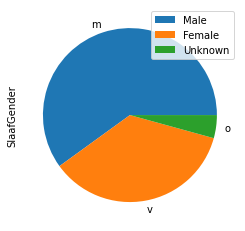

In [37]:
permissions["SlaafGender"].replace("[m]","m").replace("[v]","v").replace(float("nan"), "o").value_counts(dropna=False).plot.pie()
plt.legend(["Male", "Female", "Unknown"])

plt.savefig('Figures/EDA/Permissions_slaves/Gender.png')

## Names of slaves

In [38]:
permissions["SlaafNaamNieuw"].dropna().value_counts()

September    125
Januarij      75
Oktober       74
April         71
Augustus      67
            ... 
Mercures       1
Barkatto       1
Casandra       1
Endemeiro      1
Dalida         1
Name: SlaafNaamNieuw, Length: 1075, dtype: int64

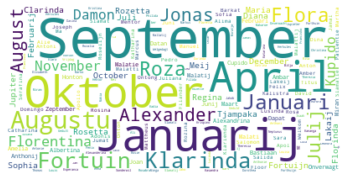

In [39]:
show_word_cloud(permissions["SlaafNaamNieuw"].dropna(), 'Figures/EDA/Permissions_slaves/New_names.png')

In [40]:
permissions["SlaafNaamOrigineel"].dropna().value_counts()

             1
September    1
Fortuin      1
Name: SlaafNaamOrigineel, dtype: int64

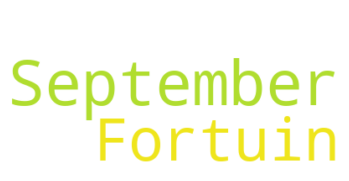

In [41]:
show_word_cloud(permissions["SlaafNaamOrigineel"].dropna(), 'Figures/EDA/Permissions_slaves/Old_names.png')

## Owners

### Buyer

In [42]:
permissions.columns

Index(['ID', 'Permissie', 'Inventarisnummer', 'Scan', 'Plaats', 'Datum',
       'BezitterVoornaam', 'BezitterPatroniem', 'BezitterTussen',
       'BezitterAchternaam', 'BezitterGender', 'BezitterHerkomst',
       'BezitterBeroep', 'BezitterWerkplek', 'BezitterEtniciteit',
       'BezitterStatus', 'SlaafNaamNieuw', 'SlaafNaamOrigineel', 'SlaafKaste',
       'SlaafGender', 'Opmerking', 'Betaling', 'Door[Kantlijn]'],
      dtype='object')

#### Gender

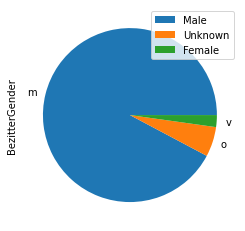

In [43]:
permissions["BezitterGender"].replace("[m]","m").replace("[v]","v").replace(float("nan"), "o").value_counts(dropna=False).plot.pie()
plt.legend(["Male", "Unknown", "Female"])

plt.savefig('Figures/EDA/Permissions_owners/gender_buyers.png')

#### First name

In [44]:
permissions["BezitterVoornaam"].dropna().value_counts()

Jan         100
Joseph       88
Collet       68
Mangin       63
Peltie       62
           ... 
Aletta        1
Ameth         1
Sadaxsin      1
In:           1
Ulrica        1
Name: BezitterVoornaam, Length: 685, dtype: int64

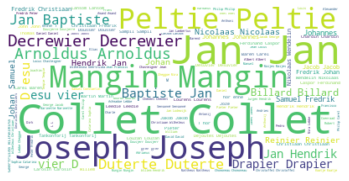

In [45]:
show_word_cloud(permissions["BezitterVoornaam"].dropna(), 'Figures/EDA/Permissions_owners/first_names_buyers.png')

#### Achternaam

In [46]:
permissions["BezitterAchternaam"].dropna().value_counts()

Chardin       171
Lebel          56
Bernard        45
Fonveigne      41
Messemaker     41
             ... 
Beaumar         1
Woolord         1
Werter          1
Olfenius        1
Jasjean         1
Name: BezitterAchternaam, Length: 889, dtype: int64

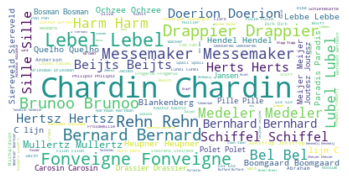

In [47]:
show_word_cloud(permissions["BezitterAchternaam"].dropna(), 'Figures/EDA/Permissions_owners/last_names_buyers.png')

#### Occupations

In [48]:
permissions["BezitterBeroep"].dropna().value_counts()

Kapitain                             849
Schipper                             107
Oppermeester                          66
Gezaghebber                           62
Capitain                              59
                                    ... 
Den Muster van het Chialoup Sunda      1
Saperkar                               1
Kapitein                               1
Derdewaaks                             1
Kapn:                                  1
Name: BezitterBeroep, Length: 251, dtype: int64

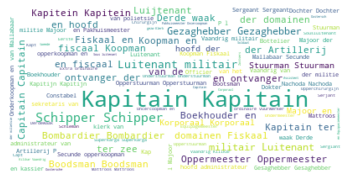

In [49]:
show_word_cloud(permissions["BezitterBeroep"].dropna(), 'Figures/EDA/Permissions_owners/occupation_buyers.png')

#### Ethnicity

In [50]:
permissions["BezitterEtniciteit"].dropna().value_counts()

Fransch                 987
Frans                   388
Engels                  208
Engelsch                111
Moor                     66
Portugeesch              58
Portugees                51
[Fransch]                32
Deens                    23
Toepas                    8
Armeender                 7
Joods                     6
Deensch                   5
Jood                      3
Armeniers                 2
Malaitsch                 2
Fransman                  2
Armeensch                 2
Arabier                   2
Deen                      2
Maleijs                   2
Armenijer                 1
Englesch                  1
[Engel]sch                1
Armeens                   1
[Por]tugeesch             1
Armeendersch              1
Engelsman                 1
Italiaansch               1
Moorsch                   1
Engelsche                 1
Het schip Teijlingen      1
Name: BezitterEtniciteit, dtype: int64

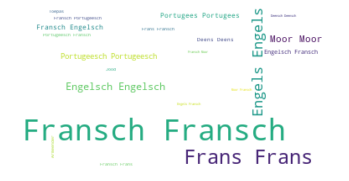

In [51]:
show_word_cloud(permissions["BezitterEtniciteit"].dropna(), 'Figures/EDA/Permissions_owners/ethnicity_buyers.png')

# Both

In [52]:
transactions['Datum'] = pd.to_datetime(transactions['Datum'], errors="coerce")
permissions['Datum'] = pd.to_datetime(permissions['Datum'], errors="coerce")

In [53]:
def find_matches():
    res = []
    for i, transaction in transactions.iterrows():
        matches = permissions.query(f"SlaafNaamNieuw == '{transaction['SlaafNaamNieuw']}'")
        if not matches.empty:
            for j, match in matches.iterrows():
                diff = (match["Datum"] - transaction["Datum"]).days
                if diff < 365*2 and diff > 0:
                    if transaction["KoperVoornaam"] == match["BezitterVoornaam"]:
                        if transaction["KoperAchternaam"] == match["BezitterAchternaam"]:
                            res.append((diff, transaction, match))
    return res
            
data_matches = find_matches()

In [54]:
len(data_matches)

32

In [55]:
data_matches[1]

(53,
 ID                                        1434-226-1
 Verkoop                                          1.0
 Inventarisnummer                                1434
 Scan                                           226.0
 Plaats                                        Cochin
 Datum                            1794-02-18 00:00:00
 VerkoperVoornaam      Narawatoewittil Koenje Stjeren
 VerkoperPatroniem                                NaN
 VerkoperTussen                                   NaN
 VerkoperAchternaam                            Sjaren
 VerkoperGender                                     m
 VerkoperHerkomst                                 NaN
 VerkoperBeroep                                   NaN
 VerkoperWerkplek                                 NaN
 VerkoperEtniciteit                             Nairo
 VerkoperStatus                 Woonagtig te Gaiporam
 KoperVoornaam                                Mamadoe
 KoperPatroniem                                   NaN
 KoperTussen           

In [56]:
res = []
for i, transaction in transactions.iterrows():
#     print(transaction)
    matches = transactions.query(f"SlaafNaamOrigineel == '{transaction['SlaafNaamNieuw']}'")
#     print(matches)
    if not matches.empty:
        for j, match in matches.iterrows():
            print(match)
            if transaction["VerkoperVoornaam"] == match["KoperVoornaam"]:
                if transaction["VerkoperAchternaam"] == match["KoperAchternaam"]:
                    res.append((diff, transaction, match))
#     break
print(res)

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                             709-76-3
Verkoop                                                             3.0
Inventarisnummer                                                    709
Scan                                                               76.0
Plaats                                                           Cochin
Datum                                               1762-05-07 00:00:00
VerkoperVoornaam                                                    Wm:
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                              Lucasz:
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                           Boekhouder en Cranga: resident
VerkoperWerkplek                                           Crang

ID                                                             709-64-5
Verkoop                                                             5.0
Inventarisnummer                                                    709
Scan                                                               64.0
Plaats                                                           Cochin
Datum                                               1762-04-24 00:00:00
VerkoperVoornaam                                                 Joseph
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                                  NaN
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                                  657-351-1
Verkoop                                                   1.0
Inventarisnummer                                          657
Scan                                                    351.0
Plaats                                                 Cochin
Datum                                     1760-10-17 00:00:00
VerkoperVoornaam                                     Johannes
VerkoperPatroniem                                         NaN
VerkoperTussen                                            NaN
VerkoperAchternaam                                    Exspeel
VerkoperGender                                              m
VerkoperHerkomst                                          NaN
VerkoperBeroep                         Boekhouder en resident
VerkoperWerkplek                                   Calicoilan
VerkoperEtniciteit                                        NaN
VerkoperStatus                                            VOC
KoperVoo

ID                                            1003-47-1
Verkoop                                             1.0
Inventarisnummer                                   1003
Scan                                               47.0
Plaats                                           Cochin
Datum                               1775-04-18 00:00:00
VerkoperVoornaam                              Anastasia
VerkoperPatroniem                                   NaN
VerkoperTussen                                      NaN
VerkoperAchternaam                                  NaN
VerkoperGender                                        v
VerkoperHerkomst                                    NaN
VerkoperBeroep                                      NaN
VerkoperWerkplek                                    NaN
VerkoperEtniciteit                             Christen
VerkoperStatus                      Inw: op Tengapatuam
KoperVoornaam                                   Roeloff
KoperPatroniem                                  

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                   554-194-1
Verkoop                                    1.0
Inventarisnummer                           554
Scan                                     194.0
Plaats                                  Cochin
Datum                      1753-04-13 00:00:00
VerkoperVoornaam                        Manico
VerkoperPatroniem                          NaN
VerkoperTussen                             NaN
VerkoperAchternaam                       Mingo
VerkoperGender                               m
VerkoperHerkomst                           NaN
VerkoperBeroep                       Lascorijn
VerkoperWerkplek                           NaN
VerkoperEtniciteit          Christen lascorijn
VerkoperStatus        Inwoonder tot Manacherij
KoperVoornaam                         Anthonij
KoperPatroniem                             NaN
KoperTussen                                NaN
KoperAchternaam                     Vogelslang
KoperGender                                  m
KoperHerkomst

ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                          657-63-1
Verkoop                                          1.0
Inventarisnummer                                 657
Scan                                            63.0
Plaats                                        Cochin
Datum                            1760-02-11 00:00:00
VerkoperVoornaam                               Jacob
VerkoperPatroniem                                NaN
VerkoperTussen                                   NaN
VerkoperAchternaam                           Calkoen
VerkoperGender                                     m
VerkoperHerkomst                                 NaN
VerkoperBeroep        Onderkoopman en pakhuismeester
VerkoperWerkplek                              Cochin
VerkoperEtniciteit                               NaN
VerkoperStatus                                   VOC
KoperVoornaam                         Cornelis Dirk 
KoperPatroniem                                   NaN
KoperTussen                                  v

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


ID                                    751-89-1
Verkoop                                    1.0
Inventarisnummer                           751
Scan                                      89.0
Plaats                                  Cochin
Datum                      1764-10-19 00:00:00
VerkoperVoornaam                       Chorrij
VerkoperPatroniem                          NaN
VerkoperTussen                             NaN
VerkoperAchternaam                     Chandij
VerkoperGender                               m
VerkoperHerkomst                           NaN
VerkoperBeroep                       Lascorijn
VerkoperWerkplek                           NaN
VerkoperEtniciteit          Christen lascorijn
VerkoperStatus        Inwoonder tot Manacherij
KoperVoornaam                         Johannes
KoperPatroniem                             NaN
KoperTussen                                NaN
KoperAchternaam                          Wolff
KoperGender                                  m
KoperHerkomst

ID                                          657-63-1
Verkoop                                          1.0
Inventarisnummer                                 657
Scan                                            63.0
Plaats                                        Cochin
Datum                            1760-02-11 00:00:00
VerkoperVoornaam                               Jacob
VerkoperPatroniem                                NaN
VerkoperTussen                                   NaN
VerkoperAchternaam                           Calkoen
VerkoperGender                                     m
VerkoperHerkomst                                 NaN
VerkoperBeroep        Onderkoopman en pakhuismeester
VerkoperWerkplek                              Cochin
VerkoperEtniciteit                               NaN
VerkoperStatus                                   VOC
KoperVoornaam                         Cornelis Dirk 
KoperPatroniem                                   NaN
KoperTussen                                  v

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

ID                                   657-239-1
Verkoop                                    1.0
Inventarisnummer                           657
Scan                                     239.0
Plaats                                  Cochin
Datum                      1760-08-12 00:00:00
VerkoperVoornaam                        Daniel
VerkoperPatroniem                          NaN
VerkoperTussen                             NaN
VerkoperAchternaam                      Barkij
VerkoperGender                               m
VerkoperHerkomst                           NaN
VerkoperBeroep                       Lascorijn
VerkoperWerkplek                           NaN
VerkoperEtniciteit          Christen Lascorijn
VerkoperStatus        Inwoonder tot Bendoertij
KoperVoornaam                         Leendert
KoperPatroniem                             NaN
KoperTussen                                NaN
KoperAchternaam                          Klomp
KoperGender                                  m
KoperHerkomst

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                            657-366-1
Verkoop                                                             1.0
Inventarisnummer                                                    657
Scan                                                              366.0
Plaats                                                           Cochin
Datum                                               1760-10-20 00:00:00
VerkoperVoornaam                                                    NaN
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                                  NaN
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

Name: 4395, dtype: object
ID                                                  657-351-1
Verkoop                                                   1.0
Inventarisnummer                                          657
Scan                                                    351.0
Plaats                                                 Cochin
Datum                                     1760-10-17 00:00:00
VerkoperVoornaam                                     Johannes
VerkoperPatroniem                                         NaN
VerkoperTussen                                            NaN
VerkoperAchternaam                                    Exspeel
VerkoperGender                                              m
VerkoperHerkomst                                          NaN
VerkoperBeroep                         Boekhouder en resident
VerkoperWerkplek                                   Calicoilan
VerkoperEtniciteit                                        NaN
VerkoperStatus                              

ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

ID                                                            773-123-1
Verkoop                                                             1.0
Inventarisnummer                                                    773
Scan                                                              123.0
Plaats                                                           Cochin
Datum                                               1765-02-14 00:00:00
VerkoperVoornaam                                     Francisco Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                       de
VerkoperAchternaam                                            Consescon
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

Name: 5728, dtype: object
ID                                                 622-276-1
Verkoop                                                  1.0
Inventarisnummer                                         622
Scan                                                   276.0
Plaats                                                Cochin
Datum                                    1758-12-13 00:00:00
VerkoperVoornaam                                       Diogo
VerkoperPatroniem                                        NaN
VerkoperTussen                                            de
VerkoperAchternaam                                     Silva
VerkoperGender                                             m
VerkoperHerkomst                                         NaN
VerkoperBeroep                                           NaN
VerkoperWerkplek                                         NaN
VerkoperEtniciteit                                       NaN
VerkoperStatus                       Inwoonder tot warapoli

ID                                821-143-1
Verkoop                                 1.0
Inventarisnummer                        821
Scan                                  143.0
Plaats                               Cochin
Datum                   1767-10-21 00:00:00
VerkoperVoornaam             Chitiaan Amado
VerkoperPatroniem                       NaN
VerkoperTussen                          NaN
VerkoperAchternaam                   Aboker
VerkoperGender                            m
VerkoperHerkomst                        NaN
VerkoperBeroep                          NaN
VerkoperWerkplek                        NaN
VerkoperEtniciteit                     Moor
VerkoperStatus        Inwoonder tot Pananij
KoperVoornaam                        Ismael
KoperPatroniem                          NaN
KoperTussen                             NaN
KoperAchternaam                      Campon
KoperGender                               m
KoperHerkomst                           NaN
KoperBeroep               Ooster

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


ID                                           886-116-1
Verkoop                                            1.0
Inventarisnummer                                   886
Scan                                             116.0
Plaats                                          Cochin
Datum                              1770-06-19 00:00:00
VerkoperVoornaam                              Johannes
VerkoperPatroniem                                  NaN
VerkoperTussen                                      de
VerkoperAchternaam                              Krouze
VerkoperGender                                       m
VerkoperHerkomst                                   NaN
VerkoperBeroep        Boekhouder en Chettuase resident
VerkoperWerkplek                               Chettua
VerkoperEtniciteit                                 NaN
VerkoperStatus                                     VOC
KoperVoornaam                                   Philip
KoperPatroniem                                     NaN
KoperTusse

ID                                                            773-123-1
Verkoop                                                             1.0
Inventarisnummer                                                    773
Scan                                                              123.0
Plaats                                                           Cochin
Datum                                               1765-02-14 00:00:00
VerkoperVoornaam                                     Francisco Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                       de
VerkoperAchternaam                                            Consescon
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                        1449-27-1
Verkoop                                         1.0
Inventarisnummer                               1449
Scan                                           27.0
Plaats                                       Cochin
Datum                           1794-09-09 00:00:00
VerkoperVoornaam                              Scheg
VerkoperPatroniem                               NaN
VerkoperTussen                                  NaN
VerkoperAchternaam                            Miran
VerkoperGender                                    m
VerkoperHerkomst                                NaN
VerkoperBeroep                                  NaN
VerkoperWerkplek                                NaN
VerkoperEtniciteit                             Moor
VerkoperStatus        Woonachtig te Palakattacherie
KoperVoornaam                                Midien
KoperPatroniem                                  NaN
KoperTussen                                     NaN
KoperAchtern

ID                                        1449-27-1
Verkoop                                         1.0
Inventarisnummer                               1449
Scan                                           27.0
Plaats                                       Cochin
Datum                           1794-09-09 00:00:00
VerkoperVoornaam                              Scheg
VerkoperPatroniem                               NaN
VerkoperTussen                                  NaN
VerkoperAchternaam                            Miran
VerkoperGender                                    m
VerkoperHerkomst                                NaN
VerkoperBeroep                                  NaN
VerkoperWerkplek                                NaN
VerkoperEtniciteit                             Moor
VerkoperStatus        Woonachtig te Palakattacherie
KoperVoornaam                                Midien
KoperPatroniem                                  NaN
KoperTussen                                     NaN
KoperAchtern

ID                                                            773-123-1
Verkoop                                                             1.0
Inventarisnummer                                                    773
Scan                                                              123.0
Plaats                                                           Cochin
Datum                                               1765-02-14 00:00:00
VerkoperVoornaam                                     Francisco Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                       de
VerkoperAchternaam                                            Consescon
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


ID                                                            622-274-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              274.0
Plaats                                                           Cochin
Datum                                               1758-12-11 00:00:00
VerkoperVoornaam                                                 Pettij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                                  NaN
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                             584-30-1
Verkoop                                                             1.0
Inventarisnummer                                                    584
Scan                                                               30.0
Plaats                                                           Cochin
Datum                                               1755-11-17 00:00:00
VerkoperVoornaam                                               Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                             Caldeira
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

Name: 1450, dtype: object
ID                                           677-66-1
Verkoop                                           1.0
Inventarisnummer                                  677
Scan                                             66.0
Plaats                                         Cochin
Datum                             1761-10-16 00:00:00
VerkoperVoornaam                             Barridoe
VerkoperPatroniem                                 NaN
VerkoperTussen                                    NaN
VerkoperAchternaam                                NaN
VerkoperGender                                      m
VerkoperHerkomst                                  NaN
VerkoperBeroep                              Laskorijn
VerkoperWerkplek                                  NaN
VerkoperEtniciteit                 Christen laskorijn
VerkoperStatus                   Inwoonder tot Caloer
KoperVoornaam                                 Carolus
KoperPatroniem                                    NaN
Ko

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                         554-147-1
Verkoop                                          1.0
Inventarisnummer                                 554
Scan                                           147.0
Plaats                                        Cochin
Datum                            1753-03-18 00:00:00
VerkoperVoornaam                               Simon
VerkoperPatroniem                                NaN
VerkoperTussen                                   NaN
VerkoperAchternaam                           Domingo
VerkoperGender                                     m
VerkoperHerkomst                                 NaN
VerkoperBeroep                             Lascorijn
VerkoperWerkplek                                 NaN
VerkoperEtniciteit                Christen lascorijn
VerkoperStatus        Inwoonder tot Poelie Parnambie
KoperVoornaam                                  Maria
KoperPatroniem                                   NaN
KoperTussen                                   

Name: 445, dtype: object
ID                                                   632A-170-1
Verkoop                                                     1.0
Inventarisnummer                                           632A
Scan                                                      170.0
Plaats                                                   Cochin
Datum                                       1759-08-27 00:00:00
VerkoperVoornaam                                         Manuel
VerkoperPatroniem                                           NaN
VerkoperTussen                                              NaN
VerkoperAchternaam                                        Antij
VerkoperGender                                                m
VerkoperHerkomst                                            NaN
VerkoperBeroep                                              NaN
VerkoperWerkplek                                            NaN
VerkoperEtniciteit                                       Toepas
VerkoperStatus 

ID                                   657-239-1
Verkoop                                    1.0
Inventarisnummer                           657
Scan                                     239.0
Plaats                                  Cochin
Datum                      1760-08-12 00:00:00
VerkoperVoornaam                        Daniel
VerkoperPatroniem                          NaN
VerkoperTussen                             NaN
VerkoperAchternaam                      Barkij
VerkoperGender                               m
VerkoperHerkomst                           NaN
VerkoperBeroep                       Lascorijn
VerkoperWerkplek                           NaN
VerkoperEtniciteit          Christen Lascorijn
VerkoperStatus        Inwoonder tot Bendoertij
KoperVoornaam                         Leendert
KoperPatroniem                             NaN
KoperTussen                                NaN
KoperAchternaam                          Klomp
KoperGender                                  m
KoperHerkomst

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

Name: 3776, dtype: object
ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam         

ID                                              886-108-1
Verkoop                                               1.0
Inventarisnummer                                      886
Scan                                                108.0
Plaats                                             Cochin
Datum                                 1770-06-13 00:00:00
VerkoperVoornaam                           Pieter Adriaan
VerkoperPatroniem                                     NaN
VerkoperTussen                                        NaN
VerkoperAchternaam                               Gosenson
VerkoperGender                                          m
VerkoperHerkomst                                      NaN
VerkoperBeroep        Boekhouder en Calicoilanse resident
VerkoperWerkplek                               Calicoilan
VerkoperEtniciteit                                    NaN
VerkoperStatus                                        VOC
KoperVoornaam                                      Gilles
KoperPatroniem

ID                                    622-239-1
Verkoop                                     1.0
Inventarisnummer                            622
Scan                                      239.0
Plaats                                   Cochin
Datum                       1758-11-30 00:00:00
VerkoperVoornaam                         Simon 
VerkoperPatroniem                           NaN
VerkoperTussen                              NaN
VerkoperAchternaam                       George
VerkoperGender                                m
VerkoperHerkomst                            NaN
VerkoperBeroep                        Lascorijn
VerkoperWerkplek                            NaN
VerkoperEtniciteit           Christen Lascorijn
VerkoperStatus        Inwoonder tot mattanchera
KoperVoornaam                               Jan
KoperPatroniem                              NaN
KoperTussen                                 NaN
KoperAchternaam                          Allart
KoperGender                             

ID                                                             584-30-1
Verkoop                                                             1.0
Inventarisnummer                                                    584
Scan                                                               30.0
Plaats                                                           Cochin
Datum                                               1755-11-17 00:00:00
VerkoperVoornaam                                               Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                             Caldeira
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                       1003-75-1
Verkoop                                        1.0
Inventarisnummer                              1003
Scan                                          75.0
Plaats                                      Cochin
Datum                          1775-05-04 00:00:00
VerkoperVoornaam                               Jan
VerkoperPatroniem                              NaN
VerkoperTussen                                 NaN
VerkoperAchternaam                          Lapart
VerkoperGender                                   m
VerkoperHerkomst                               NaN
VerkoperBeroep                                 NaN
VerkoperWerkplek                               NaN
VerkoperEtniciteit                             NaN
VerkoperStatus          Vrijman; Inw: te Cannanoor
KoperVoornaam                              Diories
KoperPatroniem                                 NaN
KoperTussen                                    NaN
KoperAchternaam                

Name: 4395, dtype: object
ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                      

ID                                        1449-27-1
Verkoop                                         1.0
Inventarisnummer                               1449
Scan                                           27.0
Plaats                                       Cochin
Datum                           1794-09-09 00:00:00
VerkoperVoornaam                              Scheg
VerkoperPatroniem                               NaN
VerkoperTussen                                  NaN
VerkoperAchternaam                            Miran
VerkoperGender                                    m
VerkoperHerkomst                                NaN
VerkoperBeroep                                  NaN
VerkoperWerkplek                                NaN
VerkoperEtniciteit                             Moor
VerkoperStatus        Woonachtig te Palakattacherie
KoperVoornaam                                Midien
KoperPatroniem                                  NaN
KoperTussen                                     NaN
KoperAchtern

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                               657-94-1
Verkoop                               1.0
Inventarisnummer                      657
Scan                                 94.0
Plaats                             Cochin
Datum                 1760-02-14 00:00:00
VerkoperVoornaam                   Cotjoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                 Pokara
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                       Jenal
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                   Jelanij
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep              Oosterse vandrig
KoperWerkplek                     

ID                                                            773-123-1
Verkoop                                                             1.0
Inventarisnummer                                                    773
Scan                                                              123.0
Plaats                                                           Cochin
Datum                                               1765-02-14 00:00:00
VerkoperVoornaam                                     Francisco Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                       de
VerkoperAchternaam                                            Consescon
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                1423-161-1
Verkoop                                  1.0
Inventarisnummer                        1423
Scan                                   161.0
Plaats                                Cochin
Datum                    1793-05-29 00:00:00
VerkoperVoornaam      Tjitakeni[...] Ammadoe
VerkoperPatroniem                        NaN
VerkoperTussen                           NaN
VerkoperAchternaam                      Mami
VerkoperGender                             m
VerkoperHerkomst                         NaN
VerkoperBeroep                           NaN
VerkoperWerkplek                         NaN
VerkoperEtniciteit                      Moor
VerkoperStatus          Woonagtig te Kaloera
KoperVoornaam                      Johannes 
KoperPatroniem                           NaN
KoperTussen                              NaN
KoperAchternaam                       Pieter
KoperGender                                m
KoperHerkomst                            NaN
KoperBeroe

Name: 4661, dtype: object
ID                                       1369-145-1
Verkoop                                         1.0
Inventarisnummer                               1369
Scan                                          145.0
Plaats                                       Cochin
Datum                           1791-01-04 00:00:00
VerkoperVoornaam                            Miedien
VerkoperPatroniem                               NaN
VerkoperTussen                                  NaN
VerkoperAchternaam                           Kasali
VerkoperGender                                    m
VerkoperHerkomst                                NaN
VerkoperBeroep                                  NaN
VerkoperWerkplek                                NaN
VerkoperEtniciteit                             Moor
VerkoperStatus        Woonagtig te Koetsiem de Sima
KoperVoornaam                                  Joan
KoperPatroniem                                  NaN
KoperTussen                           

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                              1062-70-1
Verkoop                               1.0
Inventarisnummer                     1062
Scan                                 70.0
Plaats                             Cochin
Datum                 1777-08-08 00:00:00
VerkoperVoornaam                Francisco
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Rosario
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                 Toepas
VerkoperStatus                        NaN
KoperVoornaam                       Johan
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                     Duran
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                           NaN
KoperWerkplek                     

ID                                        1369-56-1
Verkoop                                         1.0
Inventarisnummer                               1369
Scan                                           56.0
Plaats                                       Cochin
Datum                           1790-12-14 00:00:00
VerkoperVoornaam                        Poetiemotie
VerkoperPatroniem                               NaN
VerkoperTussen                                  NaN
VerkoperAchternaam                          Schosen
VerkoperGender                                    m
VerkoperHerkomst                                NaN
VerkoperBeroep                                  NaN
VerkoperWerkplek                                NaN
VerkoperEtniciteit                             Moor
VerkoperStatus        Woonagtig te Tekanpaliporatoe
KoperVoornaam                                Lebbe 
KoperPatroniem                                  NaN
KoperTussen                                     NaN
KoperAchtern

ID                                               622-301-1
Verkoop                                                1.0
Inventarisnummer                                       622
Scan                                                 301.0
Plaats                                              Cochin
Datum                                  1758-12-29 00:00:00
VerkoperVoornaam                                     Andre
VerkoperPatroniem                                      NaN
VerkoperTussen                                         NaN
VerkoperAchternaam                                    Joan
VerkoperGender                                           m
VerkoperHerkomst                                       NaN
VerkoperBeroep                                   Lascorijn
VerkoperWerkplek                                       NaN
VerkoperEtniciteit                      Christen Lascorijn
VerkoperStatus                      Inwoonder tot Chakanij
KoperVoornaam                                        Eli

ID                              1062-70-1
Verkoop                               1.0
Inventarisnummer                     1062
Scan                                 70.0
Plaats                             Cochin
Datum                 1777-08-08 00:00:00
VerkoperVoornaam                Francisco
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Rosario
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                 Toepas
VerkoperStatus                        NaN
KoperVoornaam                       Johan
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                     Duran
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                           NaN
KoperWerkplek                     

ID                              1062-70-1
Verkoop                               1.0
Inventarisnummer                     1062
Scan                                 70.0
Plaats                             Cochin
Datum                 1777-08-08 00:00:00
VerkoperVoornaam                Francisco
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Rosario
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                 Toepas
VerkoperStatus                        NaN
KoperVoornaam                       Johan
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                     Duran
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                           NaN
KoperWerkplek                     

ID                                                  657-351-1
Verkoop                                                   1.0
Inventarisnummer                                          657
Scan                                                    351.0
Plaats                                                 Cochin
Datum                                     1760-10-17 00:00:00
VerkoperVoornaam                                     Johannes
VerkoperPatroniem                                         NaN
VerkoperTussen                                            NaN
VerkoperAchternaam                                    Exspeel
VerkoperGender                                              m
VerkoperHerkomst                                          NaN
VerkoperBeroep                         Boekhouder en resident
VerkoperWerkplek                                   Calicoilan
VerkoperEtniciteit                                        NaN
VerkoperStatus                                            VOC
KoperVoo

ID                                    622-239-1
Verkoop                                     1.0
Inventarisnummer                            622
Scan                                      239.0
Plaats                                   Cochin
Datum                       1758-11-30 00:00:00
VerkoperVoornaam                         Simon 
VerkoperPatroniem                           NaN
VerkoperTussen                              NaN
VerkoperAchternaam                       George
VerkoperGender                                m
VerkoperHerkomst                            NaN
VerkoperBeroep                        Lascorijn
VerkoperWerkplek                            NaN
VerkoperEtniciteit           Christen Lascorijn
VerkoperStatus        Inwoonder tot mattanchera
KoperVoornaam                               Jan
KoperPatroniem                              NaN
KoperTussen                                 NaN
KoperAchternaam                          Allart
KoperGender                             

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                                                             584-30-1
Verkoop                                                             1.0
Inventarisnummer                                                    584
Scan                                                               30.0
Plaats                                                           Cochin
Datum                                               1755-11-17 00:00:00
VerkoperVoornaam                                               Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                             Caldeira
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

Name: 5178, dtype: object
ID                              1003-58-1
Verkoop                               1.0
Inventarisnummer                     1003
Scan                                 58.0
Plaats                             Cochin
Datum                 1775-04-24 00:00:00
VerkoperVoornaam               Taijwittet
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                  Aleso
VerkoperGender                          o
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit      Christen Colacaar
VerkoperStatus        Inw: te Tekkerparoe
KoperVoornaam                       David
KoperPatroniem                        NaN
KoperTussen                            de
KoperAchternaam                     Souda
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Tamboer
KoperWer

ID                                                            773-123-1
Verkoop                                                             1.0
Inventarisnummer                                                    773
Scan                                                              123.0
Plaats                                                           Cochin
Datum                                               1765-02-14 00:00:00
VerkoperVoornaam                                     Francisco Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                       de
VerkoperAchternaam                                            Consescon
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam                             Buijs


Name: 4395, dtype: object
ID                                      1003-41-1
Verkoop                                       1.0
Inventarisnummer                             1003
Scan                                         41.0
Plaats                                     Cochin
Datum                         1775-04-15 00:00:00
VerkoperVoornaam                         Anthonij
VerkoperPatroniem                             NaN
VerkoperTussen                                van
VerkoperAchternaam                         Maurik
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                    Quartiermeester
VerkoperWerkplek                              NaN
VerkoperEtniciteit                            NaN
VerkoperStatus                                VOC
KoperVoornaam                             Lourens
KoperPatroniem                                NaN
KoperTussen                                   NaN
KoperAchternaam         

ID                                       657-89-1
Verkoop                                       1.0
Inventarisnummer                              657
Scan                                         89.0
Plaats                                     Cochin
Datum                         1760-02-14 00:00:00
VerkoperVoornaam                           Piepie
VerkoperPatroniem                             NaN
VerkoperTussen                                NaN
VerkoperAchternaam                            NaN
VerkoperGender                                  m
VerkoperHerkomst                              NaN
VerkoperBeroep                          Lascorijn
VerkoperWerkplek                              NaN
VerkoperEtniciteit             Christen Lascorijn
VerkoperStatus        Inwoonder tot Charkargattie
KoperVoornaam                             Carolus
KoperPatroniem                                NaN
KoperTussen                               van der
KoperAchternaam                             Sloot


ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                                             584-30-1
Verkoop                                                             1.0
Inventarisnummer                                                    584
Scan                                                               30.0
Plaats                                                           Cochin
Datum                                               1755-11-17 00:00:00
VerkoperVoornaam                                               Anthonij
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                             Caldeira
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                   657-239-1
Verkoop                                    1.0
Inventarisnummer                           657
Scan                                     239.0
Plaats                                  Cochin
Datum                      1760-08-12 00:00:00
VerkoperVoornaam                        Daniel
VerkoperPatroniem                          NaN
VerkoperTussen                             NaN
VerkoperAchternaam                      Barkij
VerkoperGender                               m
VerkoperHerkomst                           NaN
VerkoperBeroep                       Lascorijn
VerkoperWerkplek                           NaN
VerkoperEtniciteit          Christen Lascorijn
VerkoperStatus        Inwoonder tot Bendoertij
KoperVoornaam                         Leendert
KoperPatroniem                             NaN
KoperTussen                                NaN
KoperAchternaam                          Klomp
KoperGender                                  m
KoperHerkomst

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

Name: 1601, dtype: object
ID                                         751-202-1
Verkoop                                          1.0
Inventarisnummer                                 751
Scan                                           202.0
Plaats                                        Cochin
Datum                            1764-12-14 00:00:00
VerkoperVoornaam                                 Jan
VerkoperPatroniem                                NaN
VerkoperTussen                                   NaN
VerkoperAchternaam                           Bautist
VerkoperGender                                     m
VerkoperHerkomst                                 NaN
VerkoperBeroep                                   NaN
VerkoperWerkplek                                 NaN
VerkoperEtniciteit                               NaN
VerkoperStatus        Vrijman; inwoonder tot Repolim
KoperVoornaam                             Theodorus 
KoperPatroniem                                   NaN
KoperTussen         

ID                                       1003-75-1
Verkoop                                        1.0
Inventarisnummer                              1003
Scan                                          75.0
Plaats                                      Cochin
Datum                          1775-05-04 00:00:00
VerkoperVoornaam                               Jan
VerkoperPatroniem                              NaN
VerkoperTussen                                 NaN
VerkoperAchternaam                          Lapart
VerkoperGender                                   m
VerkoperHerkomst                               NaN
VerkoperBeroep                                 NaN
VerkoperWerkplek                               NaN
VerkoperEtniciteit                             NaN
VerkoperStatus          Vrijman; Inw: te Cannanoor
KoperVoornaam                              Diories
KoperPatroniem                                 NaN
KoperTussen                                    NaN
KoperAchternaam                

Name: 3511, dtype: object
ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                      

ID                                        1449-27-1
Verkoop                                         1.0
Inventarisnummer                               1449
Scan                                           27.0
Plaats                                       Cochin
Datum                           1794-09-09 00:00:00
VerkoperVoornaam                              Scheg
VerkoperPatroniem                               NaN
VerkoperTussen                                  NaN
VerkoperAchternaam                            Miran
VerkoperGender                                    m
VerkoperHerkomst                                NaN
VerkoperBeroep                                  NaN
VerkoperWerkplek                                NaN
VerkoperEtniciteit                             Moor
VerkoperStatus        Woonachtig te Palakattacherie
KoperVoornaam                                Midien
KoperPatroniem                                  NaN
KoperTussen                                     NaN
KoperAchtern

ID                              1062-70-1
Verkoop                               1.0
Inventarisnummer                     1062
Scan                                 70.0
Plaats                             Cochin
Datum                 1777-08-08 00:00:00
VerkoperVoornaam                Francisco
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Rosario
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                 Toepas
VerkoperStatus                        NaN
KoperVoornaam                       Johan
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                     Duran
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                           NaN
KoperWerkplek                     

ID                                                             979-90-1
Verkoop                                                             1.0
Inventarisnummer                                                    979
Scan                                                               90.0
Plaats                                                           Cochin
Datum                                               1774-03-05 00:00:00
VerkoperVoornaam                                            Twoekadaroe
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                          Koenjewapoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                                                            622-243-1
Verkoop                                                             1.0
Inventarisnummer                                                    622
Scan                                                              243.0
Plaats                                                           Cochin
Datum                                               1758-12-02 00:00:00
VerkoperVoornaam                                                 Coenje
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                               Amadoe
VerkoperGender                                                        m
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

ID                              896-312-1
Verkoop                               1.0
Inventarisnummer                      896
Scan                                312.0
Plaats                             Cochin
Datum                 1771-07-26 00:00:00
VerkoperVoornaam                  Seijdoe
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Mahamet
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                   Moor
VerkoperStatus                        NaN
KoperVoornaam                     Jodocus
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                    Ekhard
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                       Soldaat
KoperWerkplek                     

ID                              1062-70-1
Verkoop                               1.0
Inventarisnummer                     1062
Scan                                 70.0
Plaats                             Cochin
Datum                 1777-08-08 00:00:00
VerkoperVoornaam                Francisco
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Rosario
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                 Toepas
VerkoperStatus                        NaN
KoperVoornaam                       Johan
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                     Duran
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                           NaN
KoperWerkplek                     

ID                              1062-70-1
Verkoop                               1.0
Inventarisnummer                     1062
Scan                                 70.0
Plaats                             Cochin
Datum                 1777-08-08 00:00:00
VerkoperVoornaam                Francisco
VerkoperPatroniem                     NaN
VerkoperTussen                        NaN
VerkoperAchternaam                Rosario
VerkoperGender                          m
VerkoperHerkomst                      NaN
VerkoperBeroep                        NaN
VerkoperWerkplek                      NaN
VerkoperEtniciteit                 Toepas
VerkoperStatus                        NaN
KoperVoornaam                       Johan
KoperPatroniem                        NaN
KoperTussen                           NaN
KoperAchternaam                     Duran
KoperGender                             m
KoperHerkomst                         NaN
KoperBeroep                           NaN
KoperWerkplek                     

ID                                    1434-88-1
Verkoop                                     1.0
Inventarisnummer                           1434
Scan                                       88.0
Plaats                                   Cochin
Datum                       1793-10-01 00:00:00
VerkoperVoornaam      Terawilwittil Koenjamadoe
VerkoperPatroniem                           NaN
VerkoperTussen                              NaN
VerkoperAchternaam                      Makaroe
VerkoperGender                                o
VerkoperHerkomst                            NaN
VerkoperBeroep                              NaN
VerkoperWerkplek                            NaN
VerkoperEtniciteit                         Moor
VerkoperStatus         Woonagtig te Kalikoilang
KoperVoornaam                           Mamadoe
KoperPatroniem                              NaN
KoperTussen                                 NaN
KoperAchternaam                           Lebbe
KoperGender                             

In [57]:
match

ID                                                           1384-113-1
Verkoop                                                             1.0
Inventarisnummer                                                   1384
Scan                                                              113.0
Plaats                                                           Cochin
Datum                                               1791-09-22 00:00:00
VerkoperVoornaam                                                    NaN
VerkoperPatroniem                                                   NaN
VerkoperTussen                                                      NaN
VerkoperAchternaam                                                  NaN
VerkoperGender                                                      NaN
VerkoperHerkomst                                                    NaN
VerkoperBeroep                                                      NaN
VerkoperWerkplek                                                

In [67]:
for i in data_matches:
    if i[1]["KoperStatus"] == "VOC":
        print(i[1])

ID                               896-229-1
Verkoop                                1.0
Inventarisnummer                       896
Scan                                 229.0
Plaats                              Cochin
Datum                  1771-05-27 00:00:00
VerkoperVoornaam                Tomen Onij
VerkoperPatroniem                      NaN
VerkoperTussen                         NaN
VerkoperAchternaam                  Ajapoe
VerkoperGender                           m
VerkoperHerkomst                       NaN
VerkoperBeroep                   Lascorijn
VerkoperWerkplek                       NaN
VerkoperEtniciteit      Christen Lascorijn
VerkoperStatus        Inw: tot Chadelladoe
KoperVoornaam                          Jan
KoperPatroniem                         NaN
KoperTussen                            NaN
KoperAchternaam                   Talgreen
KoperGender                              m
KoperHerkomst                          NaN
KoperBeroep               Quartier meester
KoperWerkpl

In [64]:
transactions["KoperWerkplek"]

0       Schip Sloterdijk
1       Schip Sloterdijk
2                    NaN
3       Schip Sloterdijk
4                    NaN
              ...       
7192                 NaN
7193                 NaN
7194                 NaN
7195                 NaN
7196                 NaN
Name: KoperWerkplek, Length: 7197, dtype: object